In [3]:
import numpy as np
import pandas as pd
from numpy.random import randn

from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

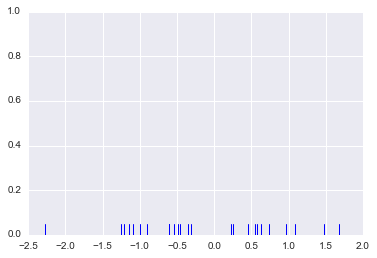

In [28]:
dataset = randn(25)
sns.rugplot(dataset)

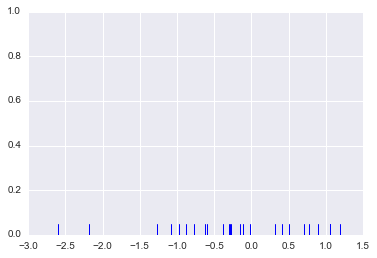

In [9]:
sns.rugplot(dataset)

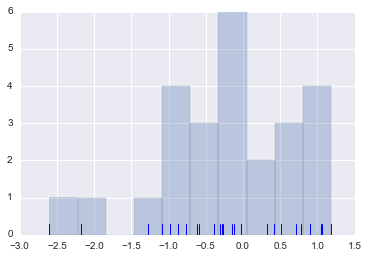

In [12]:
plt.hist(dataset,alpha = 0.3)
sns.rugplot(dataset)

(0, 1)

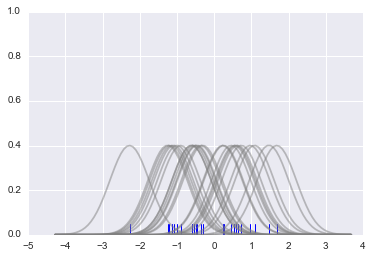

In [30]:
sns.rugplot(dataset)

x_min = dataset.min() - 2
x_max = dataset.max() + 2

x_axis = np.linspace(x_min, x_max, 100)

bandwidth = ((4*dataset.std()**5) / (3*len(dataset)))**0.2
kernel_list = []

for data_point in dataset:
    #create a kernel for each point and 
    #append it to the kernel_list
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #scle for plotting. It is meaningless.
    #For better visualization only
    kernel = kernel/ kernel.max()
    kernel = kernel*0.4
    
    plt.plot(x_axis, kernel, color = 'grey', alpha = 0.5)
plt.ylim(0,1)

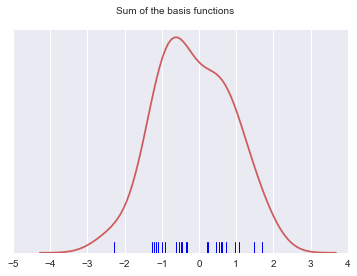

In [31]:
sum_of_kde = np.sum(kernel_list, axis = 0)

fig = plt.plot(x_axis, sum_of_kde, color = 'indianred')

sns.rugplot(dataset)
plt.yticks([])
plt.suptitle("Sum of the basis functions")

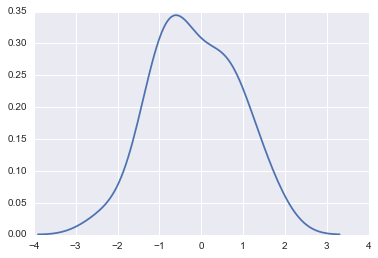

In [32]:
sns.kdeplot(dataset)

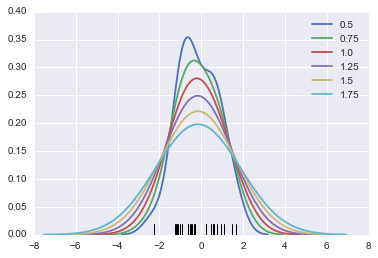

In [35]:
sns.rugplot(dataset, color = 'black')

for bw in np.arange(0.5, 2, 0.25):
    sns.kdeplot(dataset, bw = bw, lw = 1.8,label = bw)

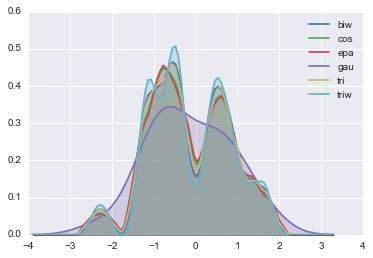

In [38]:
kernel_options = ['biw','cos','epa','gau','tri','triw']
for kern in kernel_options:
    sns.kdeplot(dataset, kernel=kern, label = kern, shade = True)

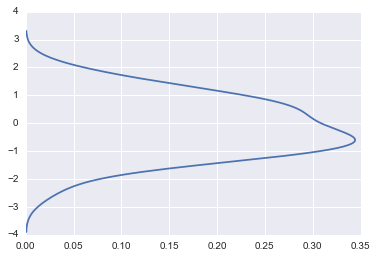

In [40]:
sns.kdeplot(dataset, vertical = True)

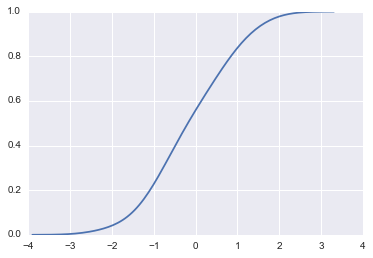

In [41]:
sns.kdeplot(dataset, cumulative = True)

In [42]:
mean = [0,0]
cov = [[1,0],[0,100]]

In [44]:
dataset2 = np.random.multivariate_normal(mean, cov, 100)
dframe = pd.DataFrame(dataset2, columns = ['X','Y'])

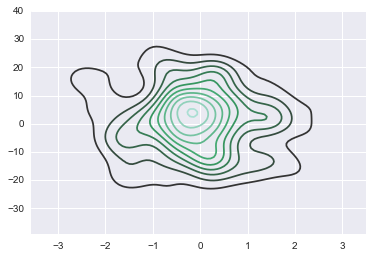

In [52]:
sns.kdeplot(dframe)

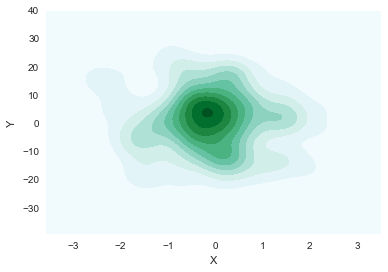

In [53]:
sns.kdeplot(dframe.X, dframe.Y, shade = True)

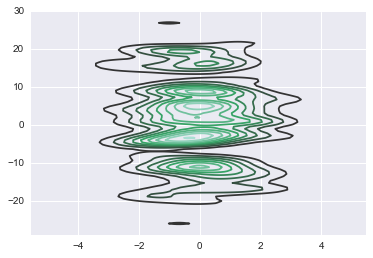

In [54]:
sns.kdeplot(dframe, bw = 1)

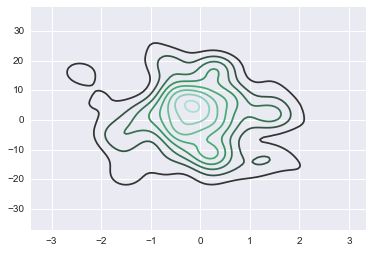

In [56]:
sns.kdeplot(dframe,bw = 'silverman')

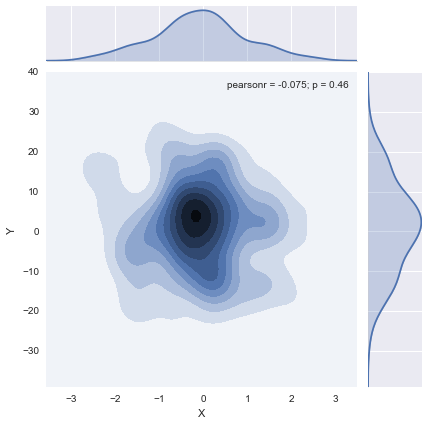

In [57]:
sns.jointplot('X','Y', dframe, kind = 'kde')